# Market segmentation example

## Import the relevant example

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the dataset

In [44]:
data = pd.read_csv('Example-Customer.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.86


## Plot the data

Text(0, 0.5, 'Loyalty')

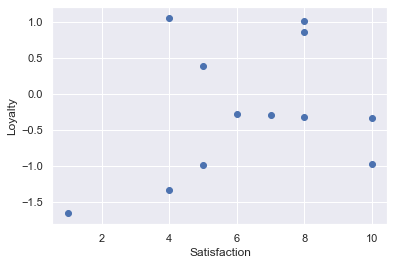

In [45]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [46]:
x = data.copy()

## Clustering

In [47]:
kmeans = KMeans(2)

In [48]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [49]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

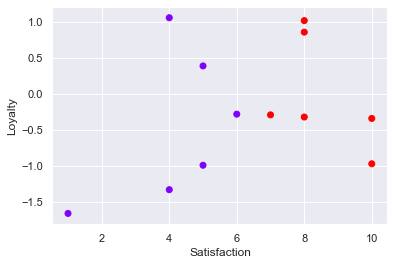

In [50]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c = clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

In [51]:
from sklearn import preprocessing
# Scale is a method which scale each variable seperately
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.91132238, -1.24739587],
       [-0.13018891, -0.0485257 ],
       [-0.52075564, -0.85919029],
       [ 0.26037782, -0.05994351],
       [-0.91132238,  1.48146099],
       [-2.08302258, -1.62418363],
       [ 1.43207802, -0.83635467],
       [ 0.65094455, -0.09419694],
       [ 0.65094455,  1.43578975],
       [ 0.65094455,  1.25310477],
       [ 1.43207802, -0.11703256],
       [-0.52075564,  0.71646765]])

## Take advantage of the Elbow Method

In [52]:
wcss = []

for i in range(1,10):
    kmeans = KMeans (i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [53]:
wcss

[24.000000000000004,
 12.322410926681616,
 6.342391743515872,
 4.413485802190976,
 2.56515526331138,
 1.1021151996233371,
 0.7332366034817683,
 0.474524460665365,
 0.24464624231939525]

Text(0, 0.5, 'WCSS')

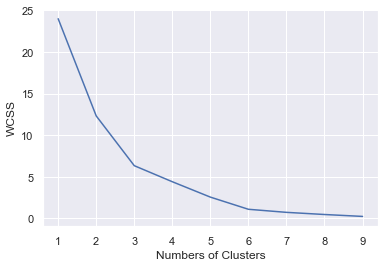

In [54]:
plt.plot(range(1,10), wcss)
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [55]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusters_pred'] = kmeans_new.fit_predict(x_scaled)

In [56]:
clusters_new

,Satisfaction,Loyalty,clusters_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,3
9,8,0.86,3


Text(0, 0.5, 'Loyalty')

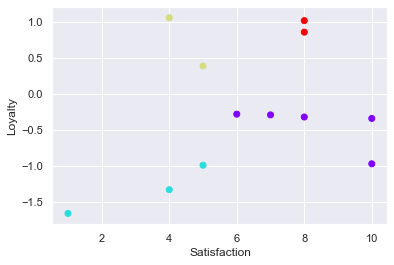

In [57]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['clusters_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')